# Do the following on the dataset

1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name".
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler

# Qn. No. 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df=pd.read_csv('Desktop\ICTK\Week 09\employee.csv')
df.head(10)

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [5]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [6]:
df.shape

(9, 7)

In [7]:
df.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

# Qn. No. 2. Reset the index as "name".

In [8]:
df=pd.read_csv('Desktop\ICTK\Week 09\employee.csv',index_col='name')
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# Qn. No. 3. Select rows for specific names Jack Morgan and Josh wills.


In [9]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# Qn. No. 4. Select data for multiple values "Sales" and “Finance”.

In [10]:
df.loc[df['department'].isin(['Sales','Finance'])]  

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Qn. No. 5. Display employee who has more than 700 performance score.


In [11]:
df['performance_score']>700

name
Allen Smith       True
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel     True
Satyam Sharma    False
James Authur     False
Josh Wills        True
Leo Duck          True
Name: performance_score, dtype: bool

In [12]:
df.loc[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Qn. No. 6. Display employee who has more than 500 and less than 700 performance score.

In [13]:
(df['performance_score']<700)&(df['performance_score']>500)

name
Allen Smith      False
S Kumar           True
Jack Morgan       True
Ying Chin         True
Dheeraj Patel    False
Satyam Sharma     True
James Authur     False
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

In [14]:
df.loc[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Qn. No. 7. Check and handle missing values in the dataset.

In [15]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [16]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [17]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


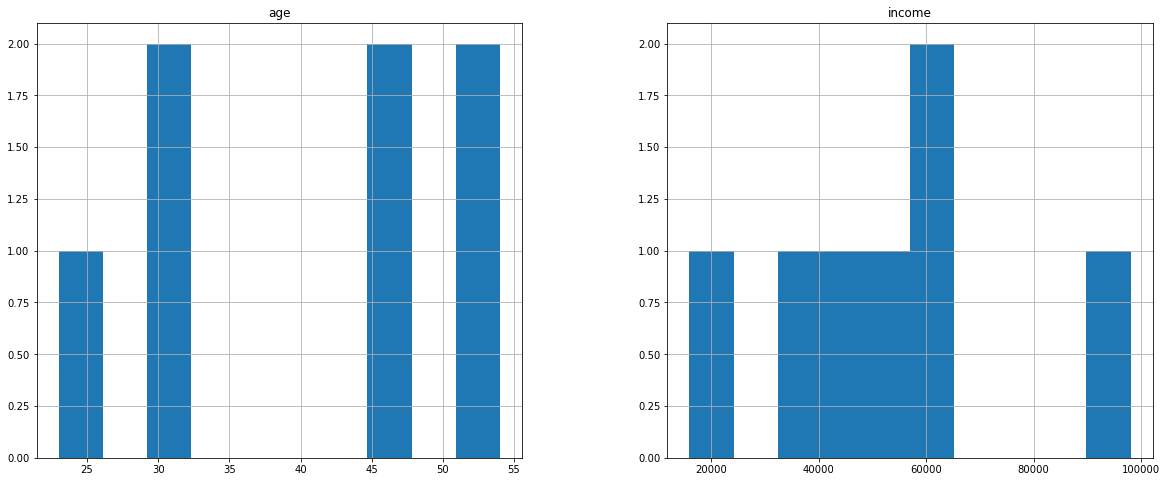

In [18]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,8))
plt.show()

In [19]:
df[['age','income']].median()

age          45.0
income    52000.0
dtype: float64

In [20]:
for i in ['age', 'income']:
    df[i]=df[i].fillna(df[i].median())
df.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [21]:
df['gender'].fillna('Others',inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Others,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Others,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Qn. No. 8. Check the outliers and handle outliers in performance score using Percentiles.


{'whiskers': [<matplotlib.lines.Line2D at 0x20b214553a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20b21455a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b21455040>],
 'medians': [<matplotlib.lines.Line2D at 0x20b21461190>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b214614f0>],
 'means': []}

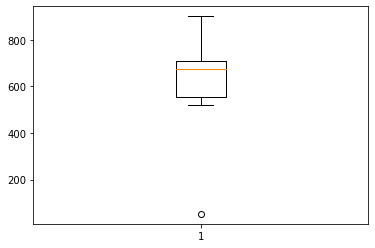

In [22]:
plt.boxplot(df['performance_score'])

In [23]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [24]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

323.5
943.5


In [25]:
outlier=[]
for x in df['performance_score']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[53]

In [26]:
ind1= df['performance_score']<low_lim
df.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [27]:
df.drop(['James Authur'],inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Others,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Others,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


{'whiskers': [<matplotlib.lines.Line2D at 0x20b214a7e80>,
 'caps': [<matplotlib.lines.Line2D at 0x20b214b4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b214a7b20>],
 'medians': [<matplotlib.lines.Line2D at 0x20b214b4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b214b4fa0>],
 'means': []}

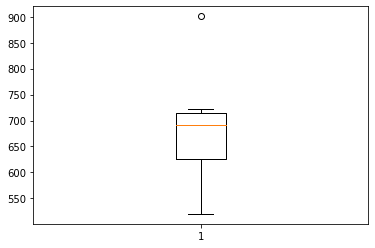

In [28]:
plt.boxplot(df['performance_score'])

In [29]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

602.5
691.5
717.0


In [30]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

430.75
888.75


In [31]:
outlier=[]
for x in df['performance_score']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[901]

In [32]:
ind1= df['performance_score']>up_lim
df.loc[ind1].index

Index(['Josh Wills'], dtype='object', name='name')

{'whiskers': [<matplotlib.lines.Line2D at 0x20b21514820>,
 'caps': [<matplotlib.lines.Line2D at 0x20b21514ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b21514490>],
 'medians': [<matplotlib.lines.Line2D at 0x20b215215e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b21521940>],
 'means': []}

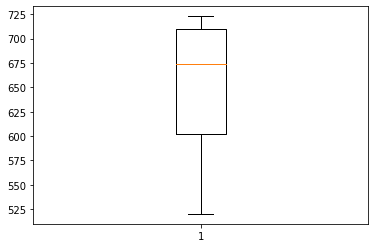

In [33]:
df.drop(['Josh Wills'],inplace=True)
plt.boxplot(df['performance_score'])

# Qn. No. 9. Check the gender column and do Dummy encoding.


In [34]:
df_dummies=pd.get_dummies(df['gender'])
df_dummies

,F,M,Others
name,,,
Allen Smith,0,0,1
S Kumar,1,0,0
Jack Morgan,0,1,0
Ying Chin,1,0,0
Dheeraj Patel,1,0,0
Satyam Sharma,0,0,1
Leo Duck,0,1,0


# Qn. No. 10. Do the standard scaling on the feature performance score.


In [35]:
from sklearn import preprocessing

In [36]:
standardisation=preprocessing.StandardScaler()
std=standardisation.fit_transform(df[['performance_score']])
std=pd.DataFrame(std)
std.describe()

,0
count,7.000000e+00
mean,-4.123686e-16
std,1.080123e+00
min,-1.730002e+00
25%,-6.223788e-01
50%,3.375614e-01
75%,8.208880e-01
max,9.954226e-01


In [37]:
print('The standardised values are:\n',std)

The standardised values are:
           0
0  0.995423
1 -1.730002
2  0.337561
3 -1.246676
4  0.834314
5  0.001918
6  0.807462
